In [1]:
def cp(C,D):
    cend=[]
    a=-1
    b=-1
    m=-1
    n=-1
    target=-1
    if C==''or D=='':
        s=1   
    else:
        for i in range(len(C)):
            t=1
            for j in range(len(D)):
                if C[i]== D[j]:
                    a=i
                    b=j
                    m=a
                    n=b
                while m < len(C) and n<len(D) and C[a:m+1]==D[b:n+1]:
                    m=m+1
                    n=n+1
                long=m-a
                if long >= t:
                    t = long
                    target = m
            
            x=target-1
            y=n-1
            if b <len(D) and C[i]==D[b] :
                cend.append(x)
            else:
                cend.append(i)
        s_AB = len(set(cend))
        z = C.find(D);
        if z!=-1:
            ss=s_AB-1;
        else:
            ss = s_AB
        s=ss/len(C)    
    return s   

In [2]:
def distCPD(C,D):
    s1 = cp(C,D);
    s2 = cp(D,C);
    dist = 0.5*(s1+s2);
    return dist

In [3]:
import pandas as pd
abt_train = pd.read_csv("buy_train.tsv", sep="\t")
abt_train

,idx,text_left,text_right,label
0,0,lg 24 ' lds4821ww semi integrated built in whi...,lg ldf6920bb fully integrated dishwasher,0
1,1,speck seethru clear hard shell case for macboo...,speck products seethru case for apple 13 ' mac...,0
2,2,denon blu-ray disc dvd/cd player dvd3800bdci 1...,denon dvd-2930ci dvd player dvd2930ci dvd + rw...,0
3,3,panasonic dect 6.0 expandable digital cordless...,panasonic kx-tg1032s dual handset digital cord...,0
4,4,sony silver minidv handycam camcorder dcrhc52 ...,sony minidv head cleaner dvm12cld head cleaner,0
...,...,...,...,...
5738,5738,sony silver cyber-shot digital camera dscw170 ...,sony cyber-shot dsc-w300 digital camera 13.6 m...,0
5739,5739,panasonic nnsd377s stainless steel countertop ...,panasonic nn-c994s genius prestige convection ...,0
5740,5740,omnimount 42 ' 63 ' wishbone cantilever extra ...,sanus visionmount flat panel tv wall mount mf1...,0
5741,5741,samsung black dvd/vhs combo recorder dvdvr375 ...,samsung dvd-v9800 dvd/vcr combo player w / 108...,0


In [4]:
train_left=abt_train['text_left']
train_right=abt_train['text_right']

In [5]:
print(len(train_left))
print(len(train_right))

5743
5743


In [6]:
dist_train=[]
for i in range(len(train_left)):
    d=distCPD(train_left[i],train_right[i])
    dist_train.append(d)
dist_train 

[0.5780775075987842,
 0.5064637759224346,
 0.6305177807571984,
 0.4870790378006873,
 0.6748823040708944,
 0.4936856098371552,
 0.5180755395683453,
 0.6211038961038962,
 0.5180250229730685,
 0.4880608076352988,
 0.5284526438872288,
 0.5930525255915422,
 0.5544761904761905,
 0.6027556440903055,
 0.5900063051702396,
 0.5886948529411764,
 0.6508080155138979,
 0.6471098982882659,
 0.6160255469094112,
 0.6423403288127889,
 0.5923683469445227,
 0.5241273693943597,
 0.44920449569405924,
 0.5735232509426058,
 0.6073653471771576,
 0.447597658908398,
 0.5903361344537815,
 0.5882832173011406,
 0.4013399412628488,
 0.5944740270775506,
 0.5197562214321991,
 0.29838273181926434,
 0.6002063071028588,
 0.5106747998475029,
 0.5343091876880351,
 0.6195364238410597,
 0.6310798750557787,
 0.5462137801089779,
 0.5436332350049164,
 0.5005305602716469,
 0.3002674783250323,
 0.6040282458674371,
 0.47285221571906355,
 0.49628316004275586,
 0.5306534920278464,
 0.4605169340463458,
 0.5221011673151751,
 0.4157362

In [7]:
truth_train=abt_train['label']
truth_train

0       0
1       0
2       0
3       0
4       0
       ..
5738    0
5739    0
5740    0
5741    0
5742    0
Name: label, Length: 5743, dtype: int64

In [8]:
is_same=[]
is_diff=[]
for i in range(len(truth_train)):
    if truth_train[i]==1:
        is_same.append(dist_train[i])
    else:
        is_diff.append(dist_train[i])

In [9]:
import numpy as np
np.mean(is_same)

0.4332672589849292

In [10]:
np.mean(is_diff)

0.5381168864951508

In [11]:
len(is_same)

616

In [12]:
same_train_round=[round(i,2) for i in is_same]
len(same_train_round)

616

In [13]:
diff_train_round=[round(i,2) for i in is_diff]
len(diff_train_round)

5127

In [14]:
def countnum(A,a):
    count=0
    for i in range(len(A)):
        if(A[i]==a):
            count=count+1
    return count 

In [16]:
num_same=[]
for i in range(101):
    num_same.append(countnum(same_train_round,0+0.01*i))

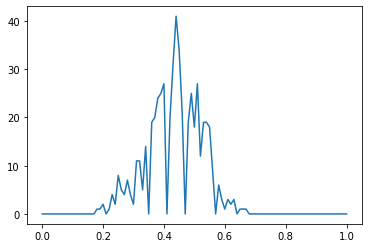

In [17]:
import matplotlib.pyplot as plt
x=np.linspace(0,1,101)
plt.plot(x,num_same)
plt.show() 

In [18]:
num_diff=[]
for i in range(101):
    num_diff.append(countnum(diff_train_round,0+0.01*i))

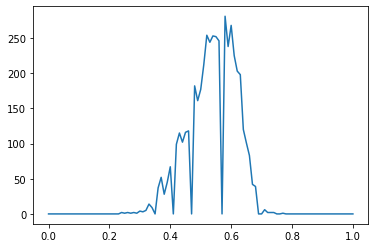

In [19]:
plt.plot(x,num_diff)
plt.show() 

In [20]:
threshold_same=[]
for i in range(len(num_same)):
    if num_same[i]>=(len(is_same)/101):
        threshold_same.append(0+0.01*i)
threshold_same

[0.25,
 0.28,
 0.31,
 0.32,
 0.34,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.48,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56]

In [21]:
aby_test = pd.read_csv("buy_test.tsv", sep="\t")
aby_test

,idx,text_left,text_right,label
0,0,sony pink cyber-shot 7.2 megapixel digital cam...,olympus fe-360 digital camera pink 226540 8 me...,0
1,1,lg 2.0 cu . ft. over-the-range white microwave...,maytag 2.0 cu . ft. over-the-range microwave oven,0
2,2,panasonic black 8.5 ' portable dvd player dvdl...,toshiba sd-p71s portable dvd player toshiba sd...,0
3,3,sony bravia theater black micro system davis50...,sony bravia dav-is50 / b home theater system d...,1
4,4,panasonic dect 6.0 expandable digital cordless...,panasonic kx-tg9342t cordless phone 1 x phone ...,0
...,...,...,...,...
1911,1911,nikon coolpix s210 plum 8.1 megapixels compact...,nikon coolpix s610 digital camera midnight bla...,0
1912,1912,lg 2.0 cu . ft. over-the-range black microwave...,lg 2.0 cu.ft . over the range microwave oven,1
1913,1913,lg dlex7177rm cherry red xl capacity electric ...,lgs new electric steamdryer,0
1914,1914,sanus 15 ' to 40 ' flat panel black tv wall mo...,omnimount ultra low profile ulpt-l flat panel ...,0


In [22]:
test_left=aby_test['text_left']
test_right=aby_test['text_right']

In [24]:
len(test_left)

1916

In [25]:
len(test_right)

1916

In [23]:
dist_test=[]
for i in range(len(test_left)):
    d=distCPD(test_left[i],test_right[i])
    dist_test.append(d)
len(dist_test)    

1916

In [26]:
test_label=aby_test['label']

In [27]:
acc=[]
for i in range(len(threshold_same)):
    predict=[]
    for j in range(len(dist_test)):
        if dist_test[j]<=threshold_same[i]:
            predict.append(1)
        else:
            predict.append(0)
    count=0        
    for k in range(len(dist_test)):
        if predict[k]==test_label[k]:
            count=count+1
    a=count/len(test_label)
    acc.append(a)   

In [28]:
print(acc)

[0.8935281837160751, 0.8940501043841336, 0.894572025052192, 0.8966597077244259, 0.8987473903966597, 0.8950939457202505, 0.8924843423799582, 0.894572025052192, 0.8888308977035491, 0.8846555323590815, 0.8596033402922756, 0.8496868475991649, 0.8329853862212944, 0.8188935281837161, 0.8042797494780793, 0.7546972860125261, 0.7239039665970772, 0.7030271398747391, 0.6711899791231732, 0.6377870563674322, 0.6038622129436325, 0.5548016701461378, 0.5182672233820459, 0.48068893528183715]


In [29]:
max(acc)

0.8987473903966597

In [30]:
for i in range(len(acc)):
    if acc[i]==max(acc):
        thre=threshold_same[i]
print(thre)   

0.34
